## Overview
---
The Bellman-Ford algorithm operates on an input graph, \( G \), with \( |V| \) vertices and \( |E| \) edges. A single source vertex, \( s \), must be provided as well, as the Bellman-Ford algorithm is a single-source shortest path algorithm. No destination vertex needs to be supplied, however, because Bellman-Ford calculates the shortest distance to all vertices in the graph from the source vertex.

The Bellman-Ford algorithm, like Dijkstra's algorithm, uses the principle of relaxation to find increasingly accurate path lengths. Bellman-Ford, though, tackles two main issues with this process:

1. If there are negative weight cycles, the search for a shortest path will go on forever.
2. Choosing a bad ordering for relaxations leads to exponential relaxations.

The detection of negative cycles is important, but the main contribution of this algorithm is in its ordering of relaxations. Dijkstra's algorithm is a greedy algorithm that selects the nearest vertex that has not been processed. Bellman-Ford, on the other hand, relaxes all of the edges.

Bellman-Ford labels the edges for a graph \( G \) as

\[ e_1, e_2, ..., e_m \]

and that set of edges is relaxed exactly \( |V| - 1 \) times, where \( |V| \) is the number of vertices in the graph.

---

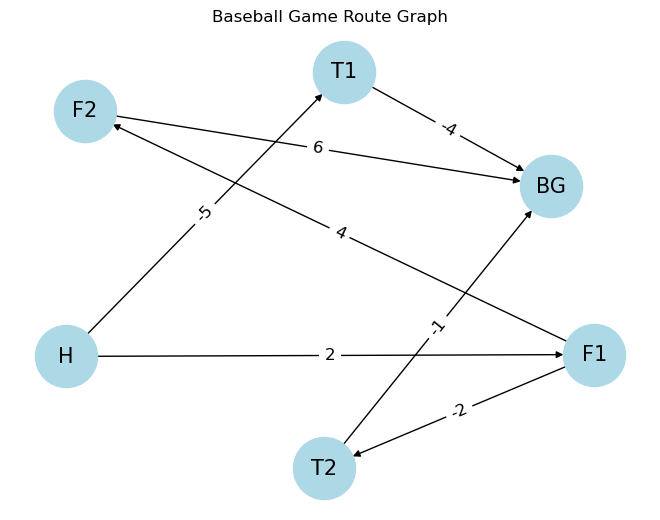

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a sample graph using networkx
G = nx.DiGraph()

# Adding nodes (locations)
nodes = ["H", "F1", "F2", "T1", "T2", "BG"]
G.add_nodes_from(nodes)

# Adding edges with weights (paths and their costs)
edges = [
    ("H", "F1", 2),
    ("H", "T1", -5),
    ("F1", "F2", 4),
    ("F1", "T2", -2),
    ("T1", "BG", -4),
    ("F2", "BG", 6),
    ("T2", "BG", -1)
]
G.add_weighted_edges_from(edges)

# Drawing the graph
pos = nx.spring_layout(G, k=5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

plt.title("Baseball Game Route Graph")
plt.show()


## Algorithm Pseudo-Code
---
The pseudo-code for the Bellman-Ford algorithm is quite short.

This is a high-level description of Bellman-Ford written with pseudo-code, not an implementation.

```python
for v in V:
    v.distance = infinity
    v.p = None
source.distance = 0
for i from 1 to |V| - 1:
    for (u, v) in E:
        relax(u, v)
```

The first `for` loop sets the distance to each vertex in the graph to infinity. This is later changed for the source vertex to equal zero. Also in that first `for` loop, the `p` value for each vertex is set to nothing. This value is a pointer to a predecessor vertex so that we can create a path later.

The next `for` loop simply goes through each edge \((u, v)\) in \(E\) and relaxes it. This process is done \(|V| - 1\) times.

---

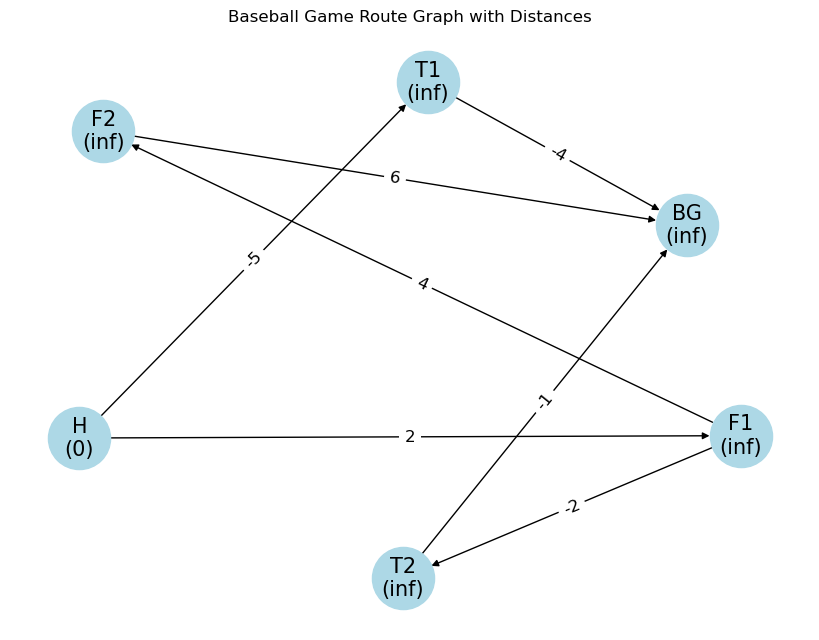

In [2]:
def initialize(graph, source):
    """Initialization step of Bellman-Ford."""
    distance = {node: float('infinity') for node in graph}
    predecessor = {node: None for node in graph}
    distance[source] = 0
    return distance, predecessor

def draw_graph_with_distance(G, pos, distance):
    """Draws the graph with node labels as distances."""
    labels = {node: f"{node}\n({dist})" for node, dist in distance.items()}
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.title("Baseball Game Route Graph with Distances")
    plt.show()

# Initialization
source = "H"
distance, predecessor = initialize(G, source)

# Draw the graph with distances
draw_graph_with_distance(G, pos, distance)


## Relaxation Equation
---

Relaxation is the most important step in Bellman-Ford. It is what increases the accuracy of the distance to any given vertex. Relaxation works by continuously shortening the calculated distance between vertices comparing that distance with other known distances.

Take the baseball example from earlier. Let's say I think the distance to the baseball stadium is 20 miles. However, I know that the distance to the corner right before the stadium is 10 miles, and I know that from the corner to the stadium, the distance is 1 mile. Clearly, the distance from me to the stadium is at most 11 miles. So, I can update my belief to reflect that. That is one cycle of relaxation, and it's done over and over until the shortest paths are found.

This is the relaxation equation.

**Relax Equation**

```python
def relax(u, v):
    if v.distance > u.distance + weight(u, v):
        v.distance = u.distance + weight(u, v)
        v.p = u
```

Distance to every vertex besides the source starts at infinity, so a clear starting point for this algorithm is an edge out of the source vertex. 

Relaxation is safe to do because it obeys the "triangle inequality." Another way of saying that is "The distance from point A to point C should be less than or equal to the sum of the distances from point A to point B and from point B to point C.":

distance(A, C) <= distance(A, B) + distance(B, C)

---

Iteration 0:


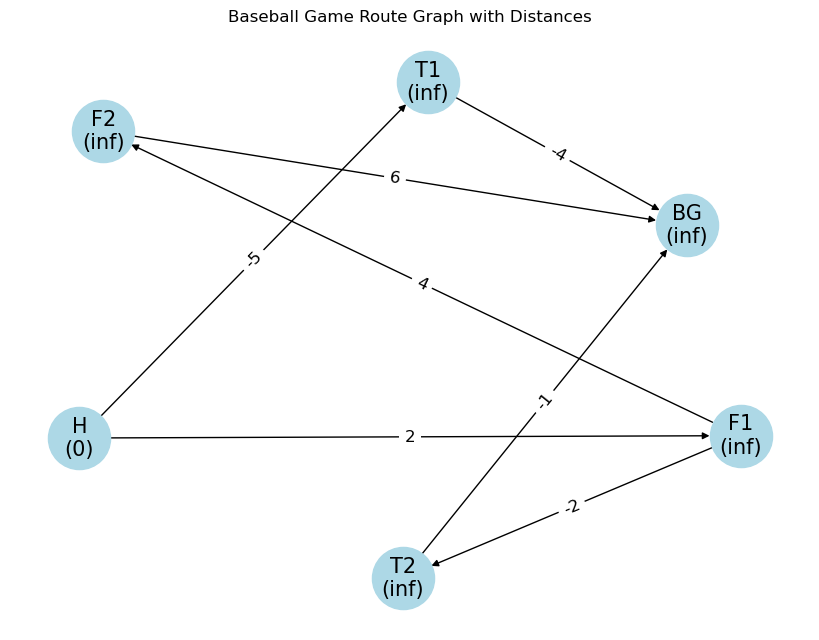

Iteration 1:


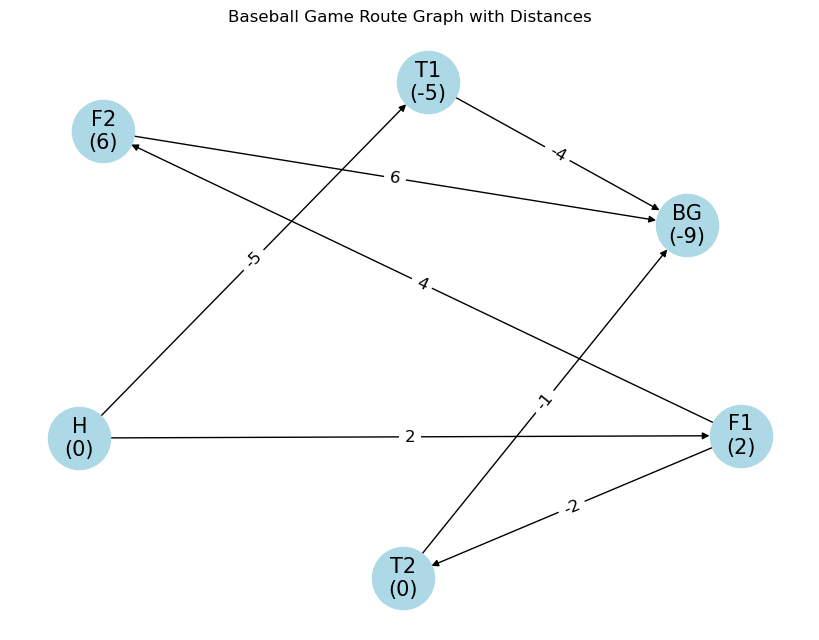

Iteration 2:


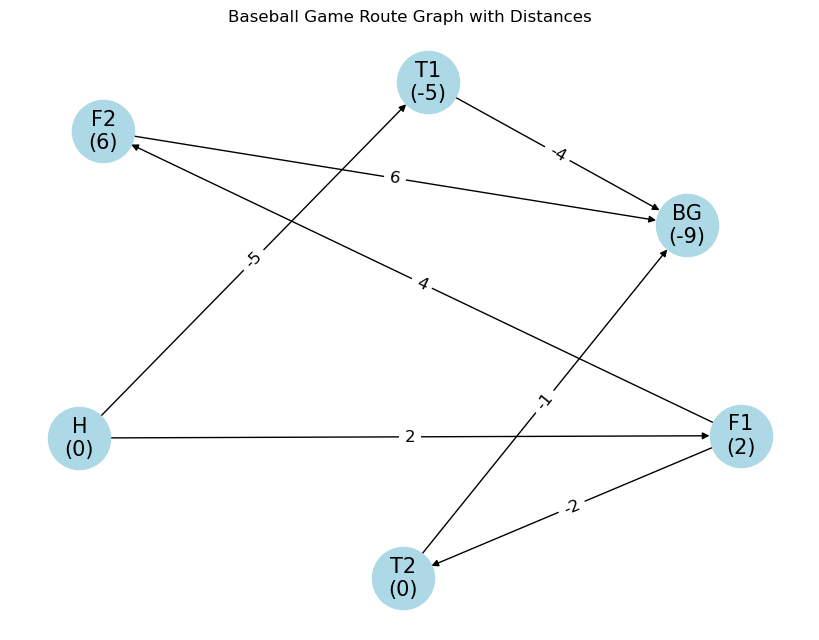

Iteration 3:


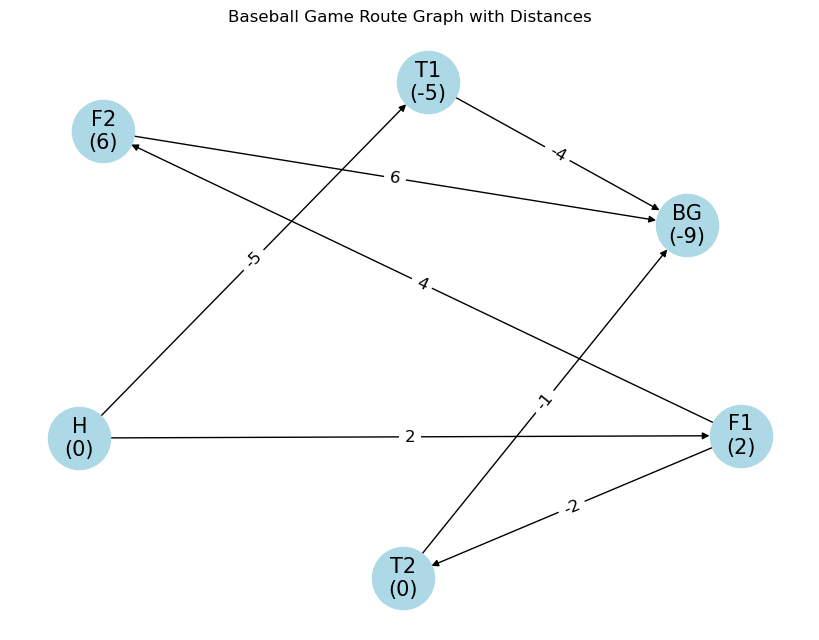

Iteration 4:


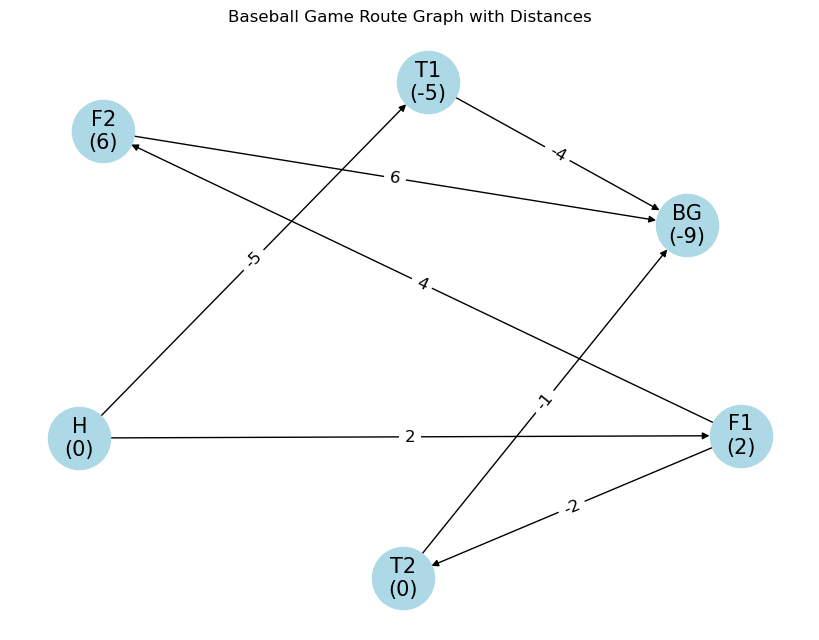

Iteration 5:


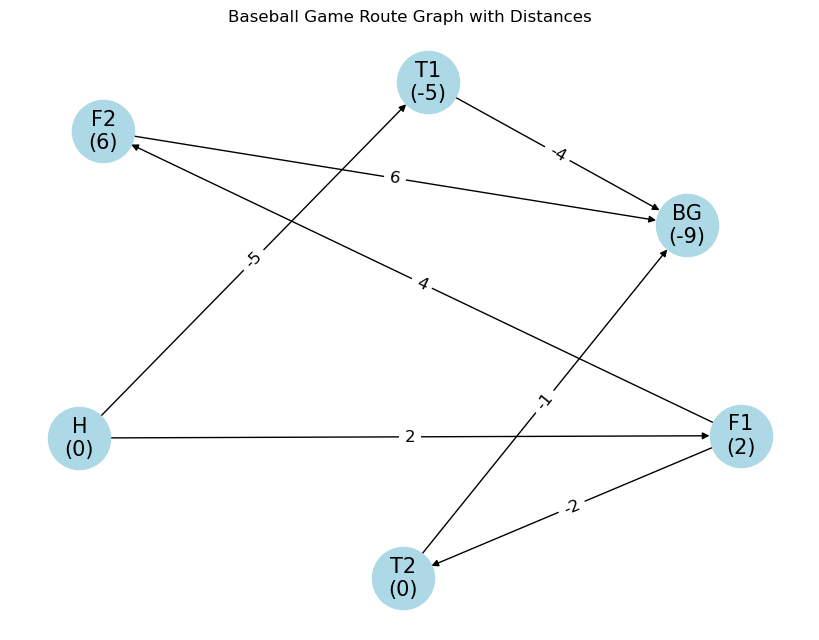

In [3]:
def relax(graph, distance, predecessor):
    """Relaxation step of Bellman-Ford."""
    for u, v, weight in graph.edges(data='weight'):
        if distance[u] + weight < distance[v]:
            distance[v] = distance[u] + weight
            predecessor[v] = u
    return distance, predecessor

def visualize_relaxation(graph, pos, iterations):
    """Visualizes the relaxation process of Bellman-Ford."""
    # Initialize distances and predecessors
    distance, predecessor = initialize(graph, source)
    distances_over_time = [distance.copy()]

    # Relaxation
    for _ in range(iterations):
        distance, predecessor = relax(graph, distance, predecessor)
        distances_over_time.append(distance.copy())

    # Visualization
    for i, dist in enumerate(distances_over_time):
        print(f"Iteration {i}:")
        draw_graph_with_distance(graph, pos, dist)

# Let's visualize the relaxation process over |V| - 1 iterations
iterations = len(G.nodes) - 1
visualize_relaxation(G, pos, iterations)


## Detecting Negative Cycles
---
A very short and simple addition to the Bellman-Ford algorithm can allow it to detect negative cycles, something that is very important because it disallows shortest-path finding altogether. After the Bellman-Ford algorithm shown above has been run, one more short loop is required to check for negative weight cycles.

```python
for v in V:
    v.distance = infinity
    v.p = None
source.distance = 0
for i in range(1, len(V)):
    for (u, v) in E:
        relax(u, v)
for (u, v) in E:
    if v.distance > u.distance + weight(u, v):
        print("A negative weight cycle exists")
```

---

The graph has a negative cycle!


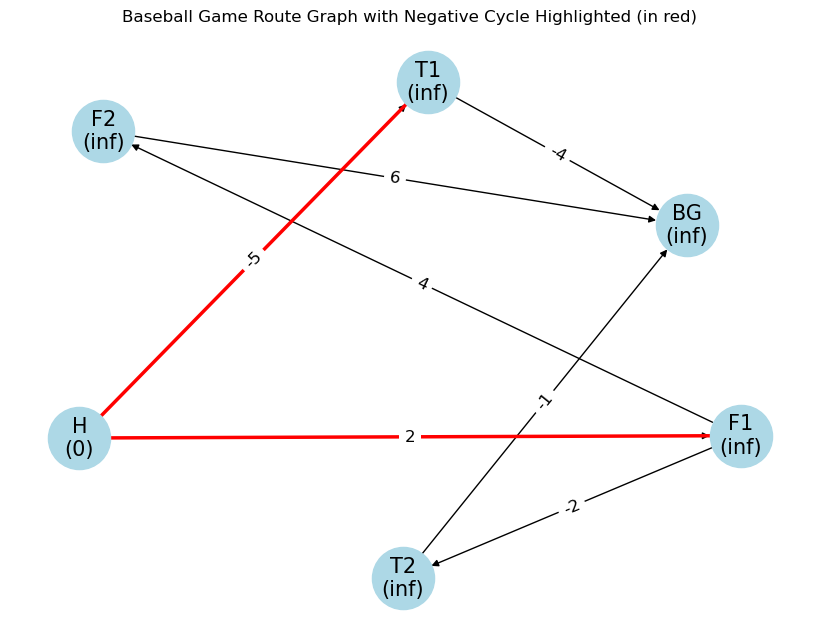

In [4]:
def has_negative_cycle(graph, distance):
    """Checks if the graph has a negative cycle."""
    for u, v, weight in graph.edges(data='weight'):
        if distance[u] + weight < distance[v]:
            return True
    return False

def highlight_negative_cycle(graph, pos, distance):
    """Highlights the negative cycle in the graph."""
    negative_edges = [(u, v) for u, v, weight in graph.edges(data='weight') if distance[u] + weight < distance[v]]
    
    # Draw the graph with distances
    labels = {node: f"{node}\n({dist})" for node, dist in distance.items()}
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color="red", width=2.5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.title("Baseball Game Route Graph with Negative Cycle Highlighted (in red)")
    plt.show()

# Check for negative cycle
if has_negative_cycle(G, distance):
    print("The graph has a negative cycle!")
    highlight_negative_cycle(G, pos, distance)
else:
    print("The graph does not have a negative cycle.")


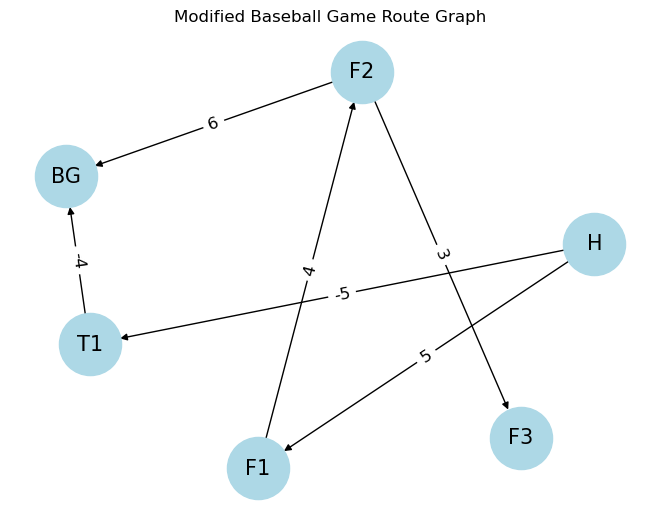

In [5]:
def modify_edge_weight(graph, u, v, new_weight):
    """Modify the weight of an edge."""
    if graph.has_edge(u, v):
        graph[u][v]['weight'] = new_weight
    else:
        print(f"No edge exists between {u} and {v}.")

def add_vertex(graph, vertex_name):
    """Add a new vertex to the graph."""
    if vertex_name not in graph:
        graph.add_node(vertex_name)
    else:
        print(f"Vertex {vertex_name} already exists.")

def remove_vertex(graph, vertex_name):
    """Remove a vertex and its associated edges from the graph."""
    if vertex_name in graph:
        graph.remove_node(vertex_name)
    else:
        print(f"Vertex {vertex_name} does not exist.")

def add_edge(graph, u, v, weight):
    """Add a new edge to the graph."""
    if not graph.has_edge(u, v):
        graph.add_edge(u, v, weight=weight)
    else:
        print(f"Edge already exists between {u} and {v}.")

def remove_edge(graph, u, v):
    """Remove an edge from the graph."""
    if graph.has_edge(u, v):
        graph.remove_edge(u, v)
    else:
        print(f"No edge exists between {u} and {v}.")

# Let's test these functions by making some modifications to the graph
modify_edge_weight(G, "H", "F1", 5)  # Modify edge weight
add_vertex(G, "F3")  # Add a new vertex
add_edge(G, "F2", "F3", 3)  # Add a new edge
remove_vertex(G, "T2")  # Remove a vertex and its associated edges

# Recalculate positions after modifying the graph
pos = nx.spring_layout(G, k=5)

# Visualize the updated graph again
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
plt.title("Modified Baseball Game Route Graph")
plt.show()


Iteration 0:


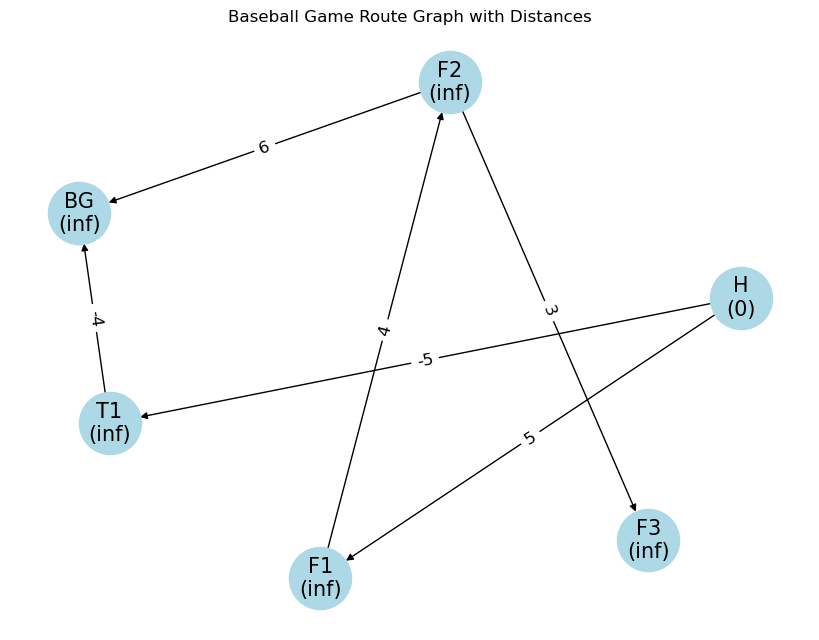

Iteration 1:


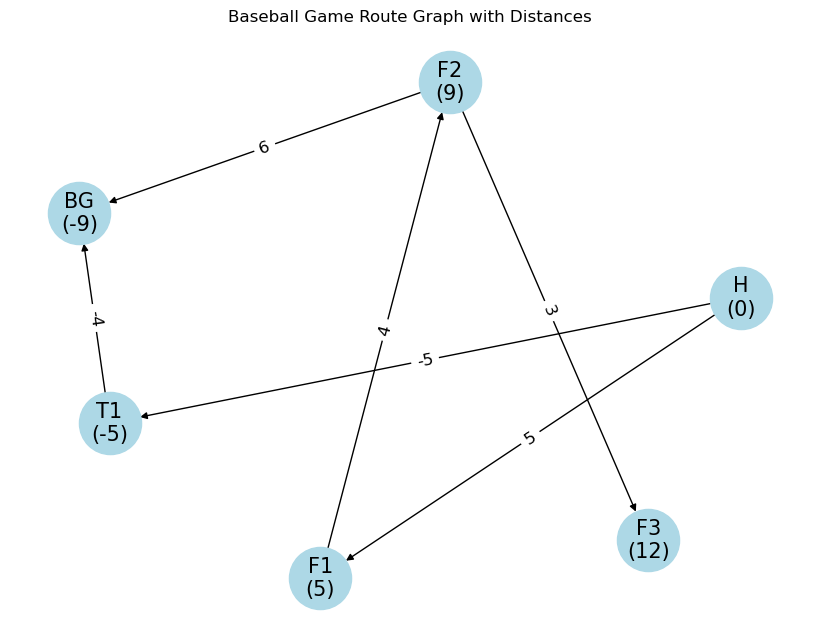

Iteration 2:


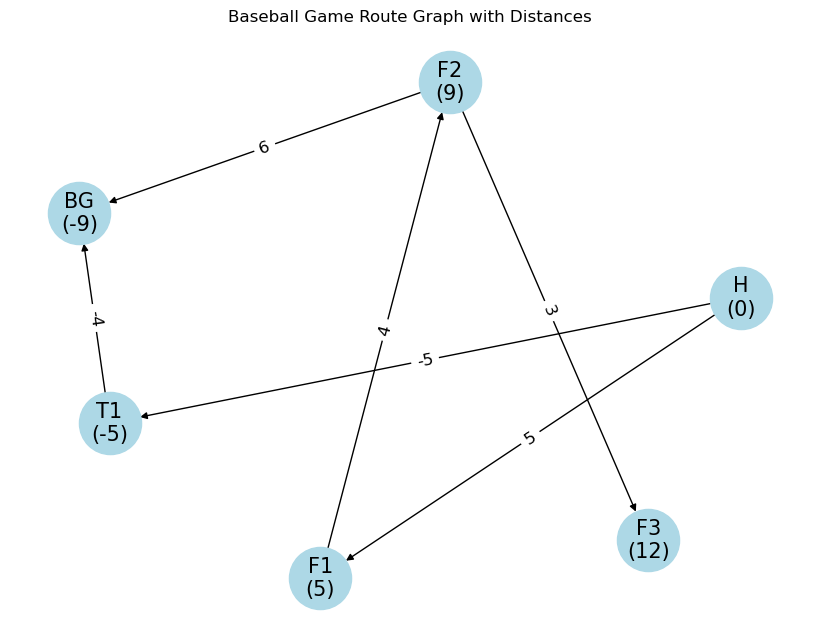

Iteration 3:


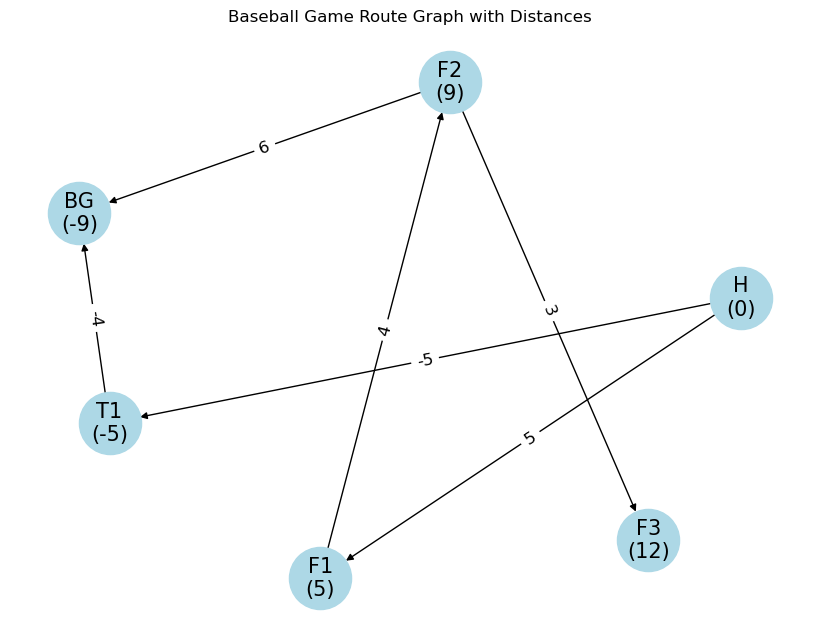

Iteration 4:


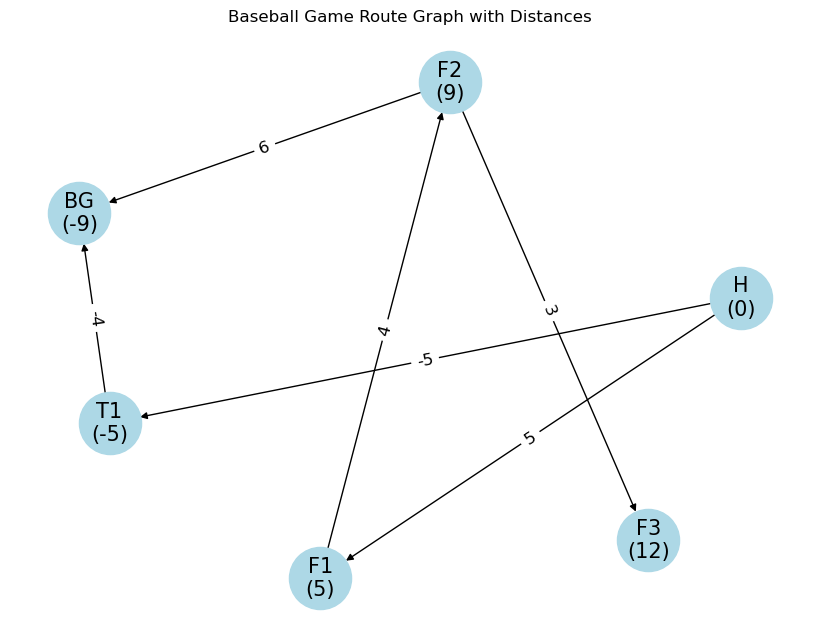

Iteration 5:


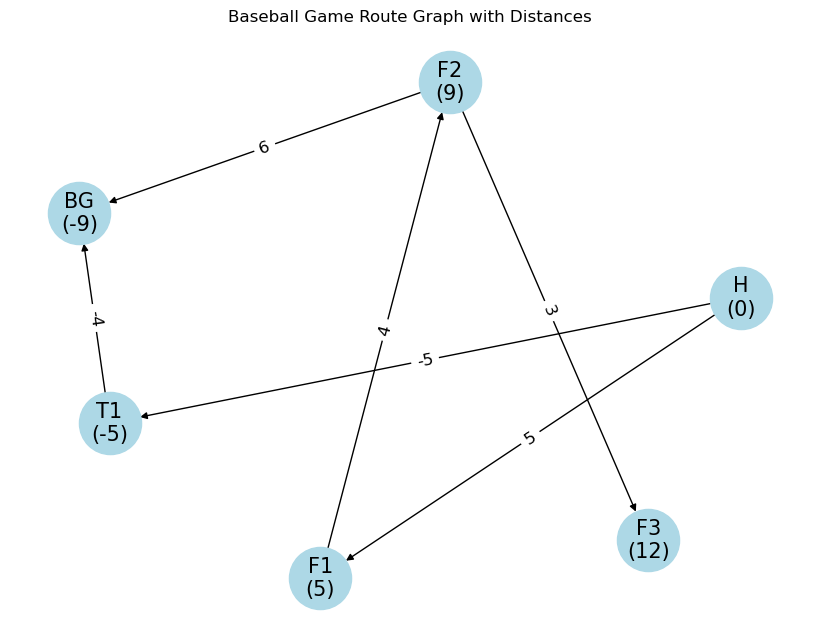

The graph has a negative cycle!


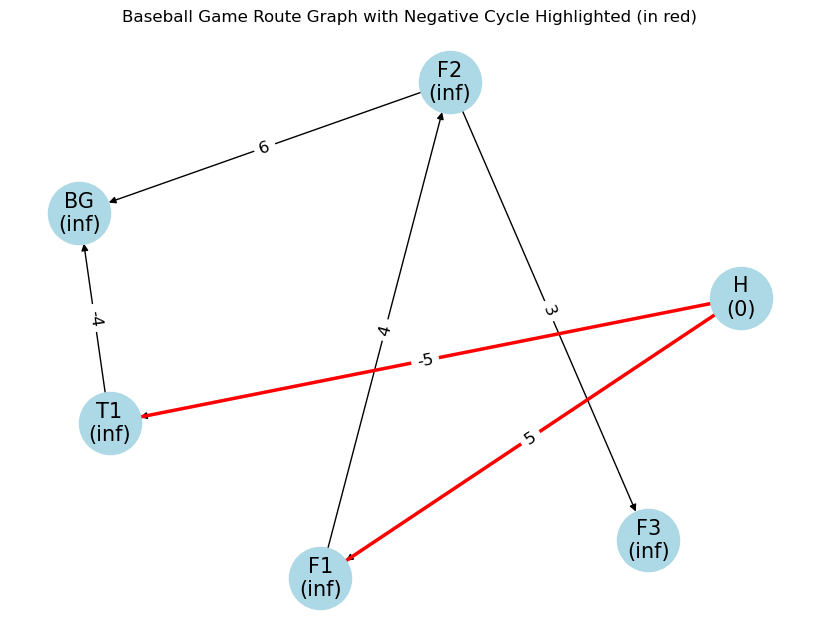

In [6]:
# Re-run the Bellman-Ford algorithm on the modified graph

# Initialization
source = "H"
distance, predecessor = initialize(G, source)

# Relaxation over |V| - 1 iterations
iterations = len(G.nodes) - 1
visualize_relaxation(G, pos, iterations)

# Check for negative cycle
if has_negative_cycle(G, distance):
    print("The graph has a negative cycle!")
    highlight_negative_cycle(G, pos, distance)
else:
    print("The graph does not have a negative cycle.")


In [15]:
# Explanations for each step of the pseudocode
pseudocode_explanations = {
    1: "Define the BellmanFord function that takes a graph and a source vertex as input.",
    2: "Initialization step begins.",
    3: "Iterate over each vertex in the graph.",
    4: "Set the initial distance to each vertex as infinity.",
    5: "Set the predecessor of each vertex as undefined.",
    6: "Set the distance to the source vertex as 0.",
    7: "Relaxation step begins.",
    8: "Iterate over the vertices of the graph (excluding the source) for relaxation.",
    9: "Iterate over each edge of the graph.",
    10: "For each edge, check if the path through the edge offers a shorter distance to the destination vertex.",
    11: "If a shorter path is found, update the distance.",
    12: "Also, update the predecessor of the destination vertex.",
    13: "Relaxation step ends.",
    14: "Negative cycle detection begins.",
    15: "Iterate over each edge of the graph.",
    16: "Check if we can still find a shorter path, indicating a negative cycle.",
    17: "If a negative cycle is detected, print a warning.",
    18: "Negative cycle detection ends.",
    19: "Return the calculated distances and predecessors for each vertex."
}

# Display the pseudocode with explanations
# for line, explanation in pseudocode_explanations.items():
#     print(f"Line {line}: {explanation}\n")


In [8]:
def bellman_ford_walkthrough(line_number):
    """Interactive walkthrough of the Bellman-Ford pseudocode."""
    
    # Check if the line number is valid
    if line_number not in pseudocode_explanations:
        return f"Invalid line number. Please enter a line number between 1 and {len(pseudocode_explanations)}."
    
    # Display the explanation for the given line
    explanation = pseudocode_explanations[line_number]
    print(f"Line {line_number}: {explanation}\n")
    
    # Visualizations based on the line number
    if line_number == 6:
        # Apply the initialization step up to Line 6
        for v in G.nodes():
            distance[v] = float('inf')
        distance["H"] = 0
        draw_graph_with_distance(G, pos, distance)
    elif line_number in range(7, 14):
        visualize_relaxation(G, pos, iterations)
    elif line_number in range(14, 19):
        if has_negative_cycle(G, distance):
            print("The graph has a negative cycle (pseudocode Line 16)!")
            highlight_negative_cycle(G, pos, distance)
        else:
            print("The graph does not have a negative cycle.")
    
    # For other lines, there's no specific visualization
    else:
        print("No specific visualization for this line.")

# # Run the function for line 6 as an example
# bellman_ford_walkthrough(16)


IntText(value=6, description='Enter Line:')

Button(description='Submit', style=ButtonStyle())

Line 6: Set the distance to the source vertex as 0.



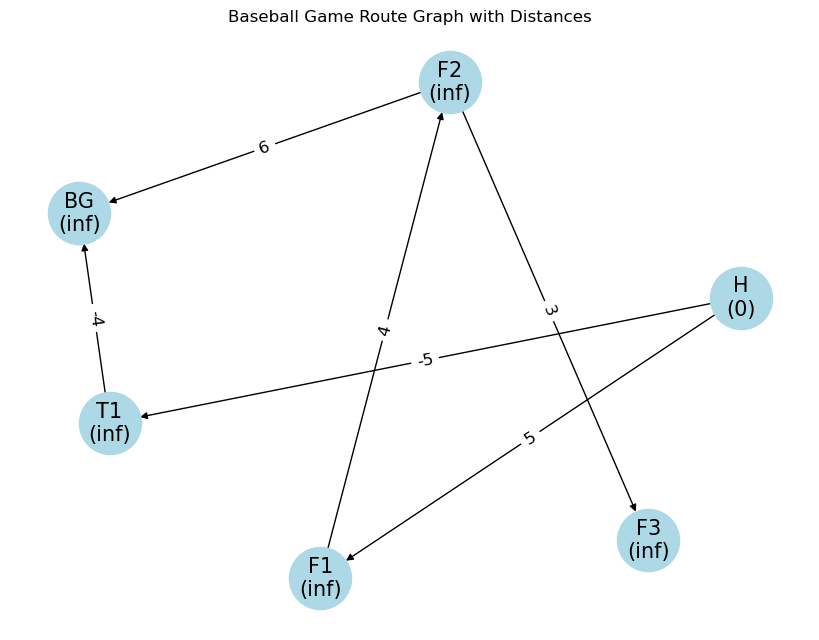

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a text input widget
line_input = widgets.IntText(
    value=1,
    description='Enter Line:',
    disabled=False
)

# Create a button to trigger the function execution
submit_button = widgets.Button(description="Submit")

# Define the button click event
def on_submit_click(button):
    clear_output(wait=True)
    display(line_input, submit_button)
    bellman_ford_walkthrough(line_input.value)

# Bind the click event to the button
submit_button.on_click(on_submit_click)

# Display the input and button
display(line_input, submit_button)


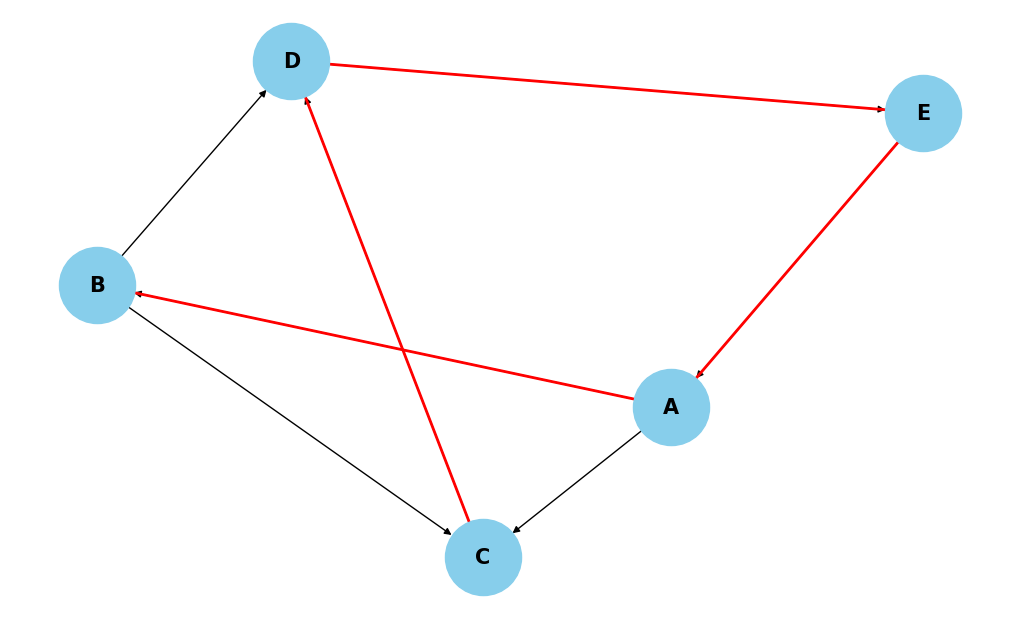

In [10]:
# 1. Bellman-Ford Algorithm Implementation
def bellman_ford(G, source):
    """Bellman-Ford algorithm."""
    distance = {node: float('inf') for node in G.nodes()}
    predecessor = {node: None for node in G.nodes()}
    distance[source] = 0

    # Relaxation
    for _ in range(len(G.nodes()) - 1):
        for u, v, weight in G.edges(data='weight'):
            if distance[u] + weight < distance[v]:
                distance[v] = distance[u] + weight
                predecessor[v] = u

    # Negative cycle detection (just a check)
    for u, v, weight in G.edges(data='weight'):
        if distance[u] + weight < distance[v]:
            raise ValueError("Graph contains a negative cycle")
            
    return distance, predecessor

# 2. Path Tracing Function
def trace_path(destination, predecessor):
    """Trace the shortest path from source to destination."""
    path = [destination]
    while destination in predecessor and predecessor[destination] is not None:
        destination = predecessor[destination]
        path.append(destination)
    path.reverse()
    return path

# 3. Path Visualization Function
def visualize_path(G, pos, path):
    """Visualize the traced path on the graph."""
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=15, font_weight='bold')
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    plt.show()

# 4. Sample Graph for Testing
sample_nodes = ["A", "B", "C", "D", "E"]
sample_edges = [("A", "B", 4), ("A", "C", 2), ("B", "C", 5), ("B", "D", 10), 
                ("C", "D", 3), ("D", "E", 9), ("E", "A", 7)]
sample_G = nx.DiGraph()
sample_G.add_nodes_from(sample_nodes)
sample_G.add_weighted_edges_from(sample_edges)
sample_pos = nx.spring_layout(sample_G, seed=42)

# Test the Path Tracing
sample_distance, sample_predecessor = bellman_ford(sample_G, "C")
sample_path = trace_path("B", sample_predecessor)
visualize_path(sample_G, sample_pos, sample_path)


---
### Time Complexity of the Bellman-Ford Algorithm

**Definition**: 
The time complexity of the Bellman-Ford algorithm is \(O(|V| times |E|)\), where \(|V|\) is the number of vertices and \(|E|\) is the number of edges in the graph.

**Explanation**:

   1. **Relaxation Process**:
      - The heart of the Bellman-Ford algorithm is the relaxation process.
      - For each vertex, the algorithm goes through all the edges to update (or "relax") their weights. This means that for a single vertex, the algorithm runs in \(O(|E|)\) time because it checks each edge once.
      - The algorithm repeats this process for all vertices. Therefore, the relaxation process, which is done \(|V|-1\) times (since we do it for all vertices except the source vertex), has a time complexity of \(O(|V| times |E|)\).  
      &nbsp;  
   2. **Negative Cycle Detection**:
      - After the relaxation process, the Bellman-Ford algorithm checks for the presence of negative cycles.
      - This involves going through all the edges once more to ensure no further updates can be made, which is done in \(O(|E|)\) time.
      - However, this complexity is dominated by the \(O(|V| times |E|)\) from the relaxation process, so it doesn't change the overall complexity.

**Reasoning**:
- The algorithm's time complexity is primarily driven by the need to ensure that the shortest path has been found. Since the longest possible path without a cycle in a graph is \(|V|-1\) edges, the algorithm must iterate over the edges at least \(|V|-1\) times to ensure the shortest path has been discovered. 
- In the worst-case scenario, every one of these iterations would involve updating the weight for each edge, leading to the \(O(|V| times |E|)\) time complexity.

**Comparison**:
- While this might seem inefficient compared to Dijkstra's algorithm (which has a time complexity of \(O(|E| + |V| log |V|)\) when using a priority queue), it's essential to note that the Bellman-Ford algorithm can handle graphs with negative edge weights, whereas Dijkstra's cannot. This versatility is the trade-off for its slower time complexity.
---

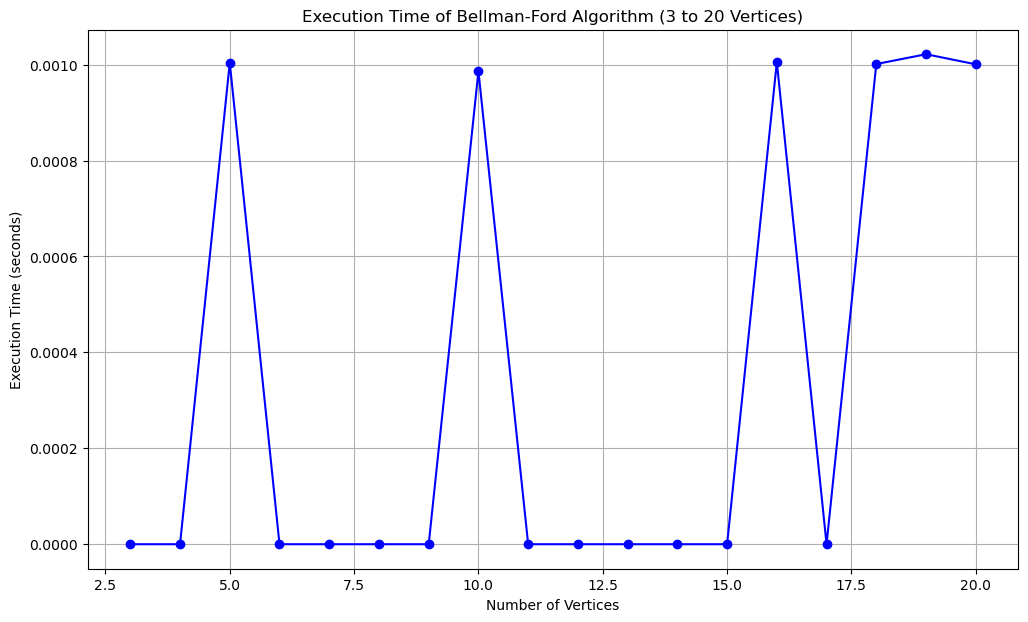

In [11]:
import random
import time
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a random directed graph with limited negative edge weights
def generate_random_graph_limited(num_nodes, num_edges):
    G = nx.DiGraph()
    for i in range(num_nodes):
        G.add_node(i)
    while G.number_of_edges() < num_edges:
        u, v = random.sample(list(G.nodes()), 2)
        weight = random.randint(-5, 20)  # Limiting the range of negative edge weights
        G.add_edge(u, v, weight=weight)
    return G

# Bellman-Ford algorithm
def bellman_ford(G, source):
    distance = {node: float('infinity') for node in G.nodes()}
    predecessor = {node: None for node in G.nodes()}
    distance[source] = 0
    
    for _ in range(len(G.nodes()) - 1):
        for u, v in G.edges():
            if distance[u] + G[u][v]['weight'] < distance[v]:
                distance[v] = distance[u] + G[u][v]['weight']
                predecessor[v] = u
                
    for u, v in G.edges():
        if distance[u] + G[u][v]['weight'] < distance[v]:
            raise ValueError("Graph contains a negative cycle.")
    
    return distance, predecessor

# Definition for maximum number of graph generation retries
MAX_TRIES = 100

# Lists to store execution times and number of vertices
execution_times = []
num_vertices = list(range(3, 21))

# Generate random graphs and measure the execution time of Bellman-Ford
for nodes in num_vertices:
    edges = nodes * (nodes - 1) // 4
    tries = 0
    while tries < MAX_TRIES:
        G_random = generate_random_graph_limited(nodes, edges)
        try:
            start_time = time.time()
            bellman_ford(G_random, 0)
            end_time = time.time()
            execution_time = end_time - start_time
            execution_times.append(execution_time)
            break
        except ValueError:
            tries += 1
    if tries == MAX_TRIES:
        execution_times.append(None)

# Plotting the execution times
plt.figure(figsize=(12, 7))
plt.plot(num_vertices, execution_times, marker='o', linestyle='-', color='b')
plt.title("Execution Time of Bellman-Ford Algorithm (3 to 20 Vertices)")
plt.xlabel("Number of Vertices")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()


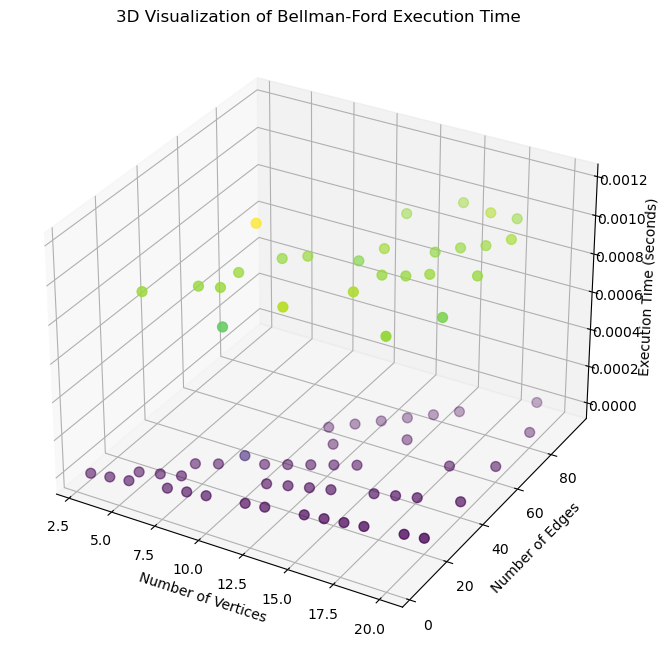

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# List to store execution times, number of vertices, and number of edges
execution_times_3d = []
vertices_list = []
edges_list = []

# Generate random graphs with varying number of vertices and edges
for nodes in range(3, 21):  # Varying vertices from 3 to 20
    for edges in range(nodes, nodes * (nodes - 1) // 2 + 1, nodes):  # Varying edges
        tries = 0
        while tries < MAX_TRIES:
            G_random = generate_random_graph_limited(nodes, edges)
            try:
                start_time = time.time()
                bellman_ford(G_random, 0)
                end_time = time.time()
                execution_time = end_time - start_time
                execution_times_3d.append(execution_time)
                vertices_list.append(nodes)
                edges_list.append(edges)
                break
            except ValueError:
                tries += 1

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices_list, edges_list, execution_times_3d, c=execution_times_3d, cmap='viridis', s=50)
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Execution Time (seconds)')
ax.set_title('3D Visualization of Bellman-Ford Execution Time')
plt.show()


In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# List of questions with choices and correct answer index
questions = [
    {
        'question': "Which of the following statements about the Bellman-Ford algorithm is true?",
        'options': [
            "It cannot handle graphs with negative edge weights.",
            "It has a faster worst-case time complexity than Dijkstra's algorithm.",
            "It can detect negative cycles in a graph.",
            "It always requires \( V^2 \) iterations to find the shortest path."
        ],
        'answer': 2
    },
    {
        'question': "What is the time complexity of the Bellman-Ford algorithm?",
        'options': [
            "O(V^2)",
            "O(V + E)",
            "O(VE)",
            "O(E \log V)"
        ],
        'answer': 2
    },
    {
        'question': "Why is Bellman-Ford preferred over Dijkstra's in some scenarios?",
        'options': [
            "It's always faster.",
            "It can handle negative edge weights.",
            "It requires less memory.",
            "It's easier to implement."
        ],
        'answer': 1
    },
    {
    'question': "What is the primary difference between Dijkstra's and Bellman-Ford algorithms?",
    'options': [
        "Dijkstra's cannot be used on weighted graphs.",
        "Bellman-Ford cannot find the shortest path.",
        "Bellman-Ford can handle negative edge weights, while Dijkstra's cannot.",
        "Dijkstra's is an iterative algorithm, while Bellman-Ford is recursive."
    ],
    'answer': 2
    },
    {
        'question': "Which scenario is the Bellman-Ford algorithm NOT suitable for?",
        'options': [
            "Finding the shortest path in a large graph without negative edges.",
            "Detecting negative cycles in a financial network.",
            "Calculating shortest paths in real-time navigation systems.",
            "Determining optimal route in a graph with tolls and rewards."
        ],
        'answer': 2
    },
    {
        'question': "How does the Bellman-Ford algorithm detect a negative cycle?",
        'options': [
            "By checking if the shortest path decreases after \( V \) iterations.",
            "By counting the number of edges in the shortest path.",
            "By ensuring no edge has a negative weight.",
            "By running Dijkstra's algorithm as a subroutine."
        ],
        'answer': 0
    },
    {
        'question': "In which iteration does the Bellman-Ford algorithm guarantee to find the shortest path for a vertex at distance \( d \) from the source?",
        'options': [
            "After \( d \) iterations.",
            "After \( 2d \) iterations.",
            "After \( d^2 \) iterations.",
            "After \( \log d \) iterations."
        ],
        'answer': 0
    },
    {
        'question': "What is the worst-case time complexity of the Bellman-Ford algorithm?",
        'options': [
            "O(V + E)",
            "O(V^2)",
            "O(VE)",
            "O(E \log V)"
        ],
        'answer': 2
    },
    {
        'question': "If a graph has no negative cycles, which statement is true for the Bellman-Ford algorithm?",
        'options': [
            "It will not find the shortest path.",
            "It will find the shortest path, but may take infinite iterations.",
            "It will find the shortest path within \( V - 1 \) iterations for all vertices.",
            "It will only work if the graph is also acyclic."
        ],
        'answer': 2
    },
    {
        'question': "Which of the following is an application of the Bellman-Ford algorithm?",
        'options': [
            "Web page ranking using the PageRank algorithm.",
            "Clustering data points in machine learning.",
            "Routing data packets in computer networks.",
            "Compressing images for storage."
        ],
        'answer': 2
    },
    {
        'question': "When visualizing the Bellman-Ford algorithm, what does the relaxation step depict?",
        'options': [
            "Removal of a vertex from the graph.",
            "Detection of a negative cycle.",
            "Update of the shortest path estimate if a shorter path is found.",
            "Initialization of all vertex distances to infinity."
        ],
        'answer': 2
}

]

# Counter to track user's score
score = 0

# Function to display each question and handle user's response
def display_question(question_data):
    global score

    # Extract data from the question dictionary
    question_text = question_data['question']
    options = question_data['options']
    correct_answer = question_data['answer']

    # Create radio buttons for choices
    radio_options = widgets.RadioButtons(
        options=options,
        description='',
        disabled=False,
        layout=widgets.Layout(width='100%', margin='0 0 10px 0')
    )

    # Submit button
    submit_button = widgets.Button(
        description="Submit",
        tooltip='Submit',
        icon='check'
    )

    # Output widget to display results
    output = widgets.Output()

    # Callback function for the submit button
    def check_answer(button):
        global score
        with output:
            clear_output()
            if radio_options.index == correct_answer:
                print("Correct!")
                score += 1
            else:
                print("Incorrect. The correct answer is:", options[correct_answer])
            if questions:  # If there are more questions
                next_question = questions.pop(0)
                display_question(next_question)
            else:
                print(f"\nQuiz completed! Your score is: {score}/11")

    submit_button.on_click(check_answer)

    # Display the question and choices
    display(widgets.VBox([widgets.Label(value=question_text), radio_options, submit_button, output]))

# Start the quiz by displaying the first question
first_question = questions.pop(0)
display_question(first_question)
